In [173]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
from sortedcontainers import SortedDict

In [174]:
# Load dataset 
data= pd.read_csv("2018_05_18_132731_normal_train_homing_simple.csv")
data.head()

,agent,event,timestep,goal_reached,timestep_to_goal,collisions_to_goal,collisions,agent_collisions_to_goal,agent_collisions,learning_score
0,0,reached goal: 1,6798,1,6798,439,439,0,0,0.029471
1,0,reached goal: 2,7648,2,850,27,466,0,0,0.071029
2,0,reached goal: 1,8266,3,618,0,466,0,0,0.084615
3,0,reached goal: 2,8846,4,580,1,467,0,0,0.089011
4,0,reached goal: 1,9336,5,490,0,467,0,0,0.089510


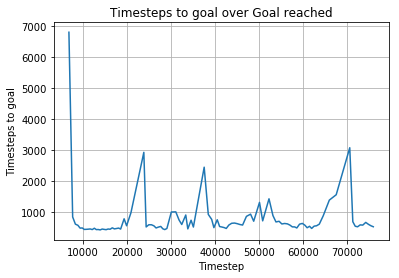

In [175]:
# Normal Plot : Timesteps to goal over Goal reached (using timesteps we recorded)

# Get data Timestep
X = data[data['event'].str.startswith('reached goal')]['timestep']

# Get data Timestep to Goal
Y = data[data['event'].str.startswith('reached goal')]['timestep_to_goal']

line = plt.plot(X, Y)
plt.xlabel('Timestep')
plt.ylabel('Timesteps to goal')
plt.title('Timesteps to goal over Goal reached')
plt.grid(True)
plt.show()

('alpha', 0.18181818181818182)
('first point EMA', 1164.9)


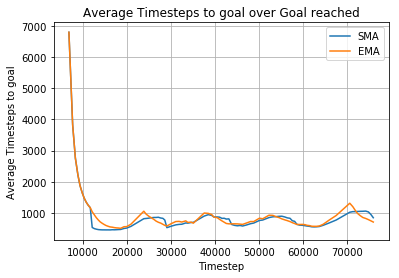

In [176]:
# Calculating different average

N = 10

# Get average timestep by goal reached
widow = deque(maxlen=N)
simple_mean = []
for i in Y:
    widow.append(i)
    SM = sum(widow) / (len(widow) + 0.)
    simple_mean.append(SM)
    
# Get exponential mean timestep by goal reached
exponential_mean = []
alpha = 2. / (1. + N)
print('alpha', alpha)
# Calculate first point using Simple Mean
w = deque(maxlen=N)
for i in xrange(N):
    w.append(Y[i])
    SM = sum(w) / (len(w) + 0.)
    exponential_mean.append(SM)
    old_EMA = SM
print('first point EMA', old_EMA)

# Now do EMA
for i in xrange(N, len(Y)):
    EMA = old_EMA + (alpha * (Y[i] - old_EMA))
    #EMA = (Y[i] * alpha) + (old_EMA * (1. - alpha))
    exponential_mean.append(EMA)
    old_EMA = EMA
    
plt.plot(X, simple_mean)
plt.plot(X, exponential_mean)
plt.xlabel('Timestep')
plt.ylabel('Average Timesteps to goal')
plt.title('Average Timesteps to goal over Goal reached')
plt.legend(['SMA', 'EMA'], loc='upper right')
plt.grid(True)
plt.show()

In [177]:
# Playing with SortedDict

# Initial dict
sd = SortedDict({3001 : 'a', 3008 : 'b', 4200 : 'c', 5600 : 'd', 7002: 'e', 100: 'f'})
print(sd)

# Adding fixed-timesteps
start = 0
stop = 100000
step = 1000
for i in xrange(start, stop + step, step):
    sd[i] = None
print(sd)

# Filling fixed-timesteps with previous value
for i in xrange(len(sd)):
    if i == 0:
        sd[i] = 0
    else:
        key = sd.peekitem(i)[0]
        value = sd.peekitem(i)[1]
        if value is None:
            prev_value = sd.peekitem(i-1)[1]
            sd[key] = prev_value
print(sd)

SortedDict(None, 1000, {100: 'f', 3001: 'a', 3008: 'b', 4200: 'c', 5600: 'd', 7002: 'e'})
SortedDict(None, 1000, {0: None, 100: 'f', 1000: None, 2000: None, 3000: None, 3001: 'a', 3008: 'b', 4000: None, 4200: 'c', 5000: None, 5600: 'd', 6000: None, 7000: None, 7002: 'e', 8000: None, 9000: None, 10000: None, 11000: None, 12000: None, 13000: None, 14000: None, 15000: None, 16000: None, 17000: None, 18000: None, 19000: None, 20000: None, 21000: None, 22000: None, 23000: None, 24000: None, 25000: None, 26000: None, 27000: None, 28000: None, 29000: None, 30000: None, 31000: None, 32000: None, 33000: None, 34000: None, 35000: None, 36000: None, 37000: None, 38000: None, 39000: None, 40000: None, 41000: None, 42000: None, 43000: None, 44000: None, 45000: None, 46000: None, 47000: None, 48000: None, 49000: None, 50000: None, 51000: None, 52000: None, 53000: None, 54000: None, 55000: None, 56000: None, 57000: None, 58000: None, 59000: None, 60000: None, 61000: None, 62000: None, 63000: None, 64

In [183]:
# Using SortedDict
dicoco = SortedDict({})

# Initial key-value (key : recorded-timesteps, value : EMA)
for i in xrange(len(X)):
    dicoco[X[i]] = exponential_mean[i]

def add_fill_fixed_timestep(start=0, stop=100000, step=1000, dico=None):
    # Adding fixed-timesteps
    for i in xrange(start, stop + step, step):
        key = i
        if not key in dico:
            dico[i] = None
    
    # Filling fixed-timesteps with previous value
    for i in xrange(len(dico)):
        if i == 0:
            dico[i] = 0
        else:
            key = dico.peekitem(i)[0]
            value = dico.peekitem(i)[1]
            if value is None:
                prev_value = dico.peekitem(i-1)[1]
                dico[key] = prev_value

add_fill_fixed_timestep(start=0, stop=100000, step=1000, dico=dicoco)
print(dicoco)
dicoco[6798]

SortedDict(None, 1000, {0: 0, 1000: 0, 2000: 0, 3000: 0, 4000: 0, 5000: 0, 6000: 0, 6798: 6798.0, 7000: 6798.0, 7648: 3824.0, 8000: 3824.0, 8266: 2755.3333333333335, 8846: 2211.5, 9000: 2211.5, 9336: 1867.2, 9831: 1638.5, 10000: 1638.5, 10279: 1468.4285714285713, 10730: 1341.25, 11000: 1341.25, 11186: 1242.888888888889, 11649: 1164.9, 12000: 1164.9, 12092: 1033.6454545454546, 12578: 934.0735537190084, 13000: 934.0735537190084, 13020: 844.6056348610068, 13465: 771.9500648862783, 13897: 710.1409621796822, 14000: 710.1409621796822, 14357: 664.6607872379218, 14806: 625.449735012845, 15000: 625.449735012845, 15246: 591.731601374146, 15707: 567.9622193061194, 16000: 567.9622193061194, 16161: 547.241815795916, 16660: 538.4705765602948, 17000: 538.4705765602948, 17125: 525.1122899129685, 17602: 516.3646008378834, 18000: 516.3646008378834, 18093: 511.75285523099546, 18552: 502.16142700717813, 19000: 502.16142700717813, 19342: 554.495713005873, 19908: 556.5874015502598, 20000: 556.5874015502598,

6798.0

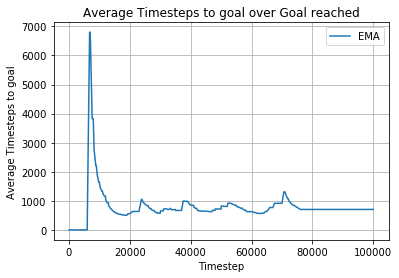

In [184]:
# Plot every key-values

new_X = dicoco.keys()
new_Y = dicoco.values()

plt.plot(new_X, new_Y)
plt.xlabel('Timestep')
plt.ylabel('Average Timesteps to goal')
plt.title('Average Timesteps to goal over Goal reached')
plt.legend(['EMA'], loc='upper right')
plt.grid(True)
plt.show()

In [185]:
# Remove the recorded timesteps, keep only the fixed-timesteps
def remove_recorded_timesteps(data_rm, dico):
    for key in data_rm:
        del dico[key]

new_dico = dicoco
remove_recorded_timesteps(X, new_dico) 
print(new_dico)

SortedDict(None, 1000, {0: 0, 1000: 0, 2000: 0, 3000: 0, 4000: 0, 5000: 0, 6000: 0, 7000: 6798.0, 8000: 3824.0, 9000: 2211.5, 10000: 1638.5, 11000: 1341.25, 12000: 1164.9, 13000: 934.0735537190084, 14000: 710.1409621796822, 15000: 625.449735012845, 16000: 567.9622193061194, 17000: 538.4705765602948, 18000: 516.3646008378834, 19000: 502.16142700717813, 20000: 556.5874015502598, 21000: 634.2987830865761, 22000: 634.2987830865761, 23000: 634.2987830865761, 24000: 1051.8808225253806, 25000: 891.4243522690565, 26000: 838.074470038319, 27000: 734.9258849016846, 28000: 668.6859229507145, 29000: 597.7980145372552, 30000: 575.8347391668451, 31000: 654.4102411365096, 32000: 725.2828886946883, 33000: 703.7769089320177, 34000: 691.3382613511855, 35000: 700.9131229236972, 36000: 668.9289187557522, 37000: 668.9289187557522, 38000: 993.1236608001609, 39000: 982.0102679274044, 40000: 863.8911710918987, 41000: 844.8200490751899, 42000: 741.4745783065321, 43000: 658.8714119242075, 44000: 646.13706087488

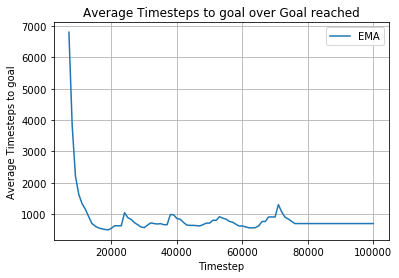

In [186]:
# Remove 0
start = 0
stop = 100000
step = 1000
x_fixed_before = range(start, stop+ step, step)
x_fixed = []
y_fixed = []
for i in x_fixed_before:
    value = dicoco[i]
    if value != 0:
        x_fixed.append(i)
        y_fixed.append(value)

# Plot fixed-timestep key-values
plt.plot(x_fixed, y_fixed)
plt.xlabel('Timestep')
plt.ylabel('Average Timesteps to goal')
plt.title('Average Timesteps to goal over Goal reached')
plt.legend(['EMA'], loc='upper right')
plt.grid(True)
plt.show()